In [1]:
import matplotlib.pyplot as plt
import pystac_client

from mccn._types import CubeConfig, FilterConfig, ProcessConfig
from mccn.extent import GeoBoxBuilder
from mccn.loader.point import PointLoadConfig, PointLoader
from mccn.parser import parse_item

client = pystac_client.Client.open("http://203.101.230.81:8082")

### Silo STD

In [2]:
silo_std_collection = client.get_collection("silo_std")
silo_std_loader = PointLoader(
    items=[parse_item(item) for item in silo_std_collection.get_items(recursive=True)],
    cube_config=CubeConfig(use_z=True),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(silo_std_collection, 10)
    ),
    load_config=PointLoadConfig(interp=None),
    process_config=ProcessConfig(rename_bands={"Tmax": "t_max", "Tmin": "t_min"}),
)
silo_std_ds = silo_std_loader.load()
silo_std_ds

<xarray.Dataset> Size: 67kB
Dimensions:  (time: 7, lat: 10, lon: 10, alt: 6)
Coordinates:
  * time     (time) datetime64[ns] 56B 2025-03-01 2025-03-02 ... 2025-03-07
  * lat      (lat) float64 80B -34.97 -34.95 -34.86 ... -31.97 -31.86 -30.86
  * lon      (lon) float64 80B 138.6 138.6 138.7 139.6 ... 141.6 141.7 142.7
  * alt      (alt) int64 48B 45 105 115 145 205 215
Data variables:
    t_max    (time, lat, lon, alt) float64 34kB nan nan nan nan ... nan nan nan
    t_min    (time, lat, lon, alt) float64 34kB nan nan nan nan ... nan nan nan

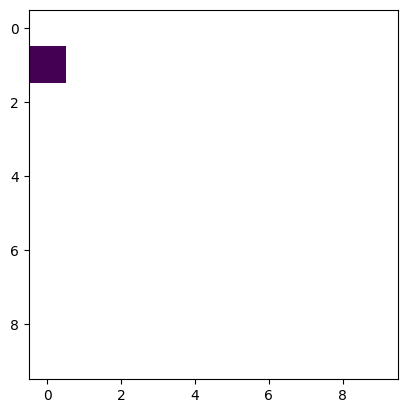

In [3]:
plt.imshow(silo_std_ds.sel(time="2025-03-01", alt=45).t_max.values)
plt.show()

### Silo Proc Bands

In [4]:
silo_proc_bands_collection = client.get_collection("silo_proc_bands")
silo_proc_bands_loader = PointLoader(
    items=[
        parse_item(item)
        for item in silo_proc_bands_collection.get_items(recursive=True)
    ],
    cube_config=CubeConfig(use_z=True),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(silo_proc_bands_collection, 10)
    ),
    load_config=PointLoadConfig(interp=None),
    process_config=ProcessConfig(
        rename_bands={"Tmax": "t_max", "Tmin": "t_min"},
        process_bands={
            "elevation_ft": lambda x: x // 3.280,
            "t_avg_f": lambda x: (x - 32) / (9 / 5),
        },
    ),
)
silo_proc_bands_ds = silo_proc_bands_loader.load()
silo_proc_bands_ds

<xarray.Dataset> Size: 101kB
Dimensions:  (time: 7, lat: 10, lon: 10, alt: 6)
Coordinates:
  * time     (time) datetime64[ns] 56B 2025-03-01 2025-03-02 ... 2025-03-07
  * lat      (lat) float64 80B -34.97 -34.95 -34.86 ... -31.97 -31.86 -30.86
  * lon      (lon) float64 80B 138.6 138.6 138.7 139.6 ... 141.6 141.7 142.7
  * alt      (alt) float64 48B 45.0 105.0 115.0 145.0 205.0 215.0
Data variables:
    t_avg_f  (time, lat, lon, alt) float64 34kB nan nan nan nan ... nan nan nan
    t_max    (time, lat, lon, alt) float64 34kB nan nan nan nan ... nan nan nan
    t_min    (time, lat, lon, alt) float64 34kB nan nan nan nan ... nan nan nan

### Soil

In [5]:
soil_collection = client.get_collection("soil")
soil_loader = PointLoader(
    items=[parse_item(item) for item in soil_collection.get_items(recursive=True)],
    cube_config=CubeConfig(use_z=False),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(soil_collection, 10)
    ),
    load_config=PointLoadConfig(interp=None),
    # process_config=ProcessConfig(rename_bands={"Tmax": "t_max", "Tmin": "t_min"})
)
soil_ds = soil_loader.load()
soil_ds

<xarray.Dataset> Size: 41kB
Dimensions:  (time: 1, lat: 32, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-03-25T13:48:00
  * lat      (lat) float64 256B -29.04 -29.04 -29.04 ... -24.34 -24.34 -24.34
  * lon      (lon) float64 256B 150.3 150.3 150.3 150.3 ... 155.8 155.8 155.8
Data variables:
    Ca_Soln  (time, lat, lon) float64 8kB nan nan nan nan ... nan nan nan nan
    S        (time, lat, lon) float64 8kB nan nan nan nan ... nan nan nan nan
    Na_Soln  (time, lat, lon) float64 8kB nan nan nan nan ... nan nan nan nan
    pH       (time, lat, lon) float64 8kB nan nan nan nan ... nan nan nan nan
    EC       (time, lat, lon) float64 8kB nan nan nan nan ... nan nan nan nan

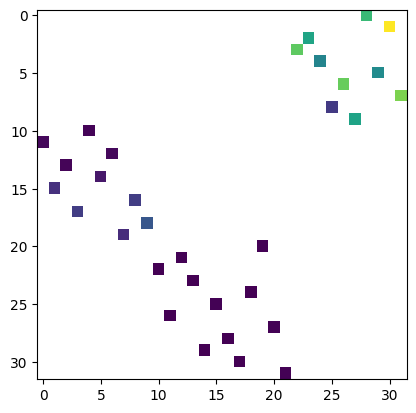

In [6]:
plt.imshow(soil_ds.S.values[0, :, :])
plt.show()

### Campey Point

In [7]:
campey_point_collection = client.get_collection("campey_point")
campey_point_loader = PointLoader(
    items=[
        parse_item(item) for item in campey_point_collection.get_items(recursive=True)
    ],
    cube_config=CubeConfig(use_z=False),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(campey_point_collection, 200)
    ),
    load_config=PointLoadConfig(interp="nearest"),
)
campey_point_ds = campey_point_loader.load()
campey_point_ds

<xarray.Dataset> Size: 1MB
Dimensions:      (time: 2, lat: 200, lon: 200)
Coordinates:
  * time         (time) datetime64[ns] 16B 2015-12-31T13:55:00 2016-12-31T13:...
  * lat          (lat) float64 2kB -30.27 -30.27 -30.27 ... -30.29 -30.29 -30.29
  * lon          (lon) float64 2kB 149.8 149.8 149.8 149.8 ... 149.8 149.8 149.8
    spatial_ref  int32 4B 4326
Data variables:
    moisture     (time, lat, lon) float64 640kB nan nan nan nan ... nan nan nan
    yield_t_ha   (time, lat, lon) float64 640kB nan nan nan nan ... nan nan nan

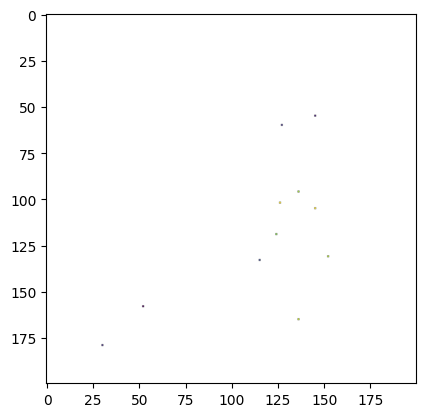

In [8]:
plt.imshow(campey_point_ds.moisture.values[0, :, :])
plt.show()